## Data Preparation for Simple Linear Regression



In [75]:
import pandas as pd

df_user = pd.read_csv('user_data.csv')

print("Data diambil dari 'user_data.csv':")
display(df_user.head())

Data diambil dari 'user_data.csv':


,Waktu_Belajar,Nilai
0,1.5,54
1,2.0,57
2,2.5,59
3,3.0,63
4,3.5,64


## Manual Calculation of Regression Coefficients

formulas:

$\beta_1 = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}$

$\beta_0 = \bar{Y} - \beta_1 \bar{X}$

Where:
- $X_i$: independent variable ('Waktu_Belajar')
- $Y_i$: dependent variable ('Nilai')
- $\bar{X}$: Rata-rata of 'Waktu_Belajar'
- $\bar{Y}$: Rata-rata of 'Nilai'

In [76]:
from sklearn.linear_model import LinearRegression

# Ubah bentuk data X agar sesuai dengan scikit-learn,
# karena scikit-learn mengharapkan data dalam bentuk array 2 dimensi.
X_user = df_user['Waktu_Belajar'].values.reshape(-1, 1)
Y_user = df_user['Nilai'].values.reshape(-1, 1)

# Buat a Linear Regression model object
model = LinearRegression()

# Sesuaikan model dengan data
model.fit(X_user, Y_user)

# Coefficients (intercept and slope)
beta0_sklearn = model.intercept_[0]
beta1_sklearn = model.coef_[0][0]

print(f"Scikit-learn Intercept (beta0): {beta0_sklearn:.4f}")
print(f"Scikit-learn Slope (beta1): {beta1_sklearn:.4f}")


Scikit-learn Intercept (beta0): 45.9727
Scikit-learn Slope (beta1): 5.4505


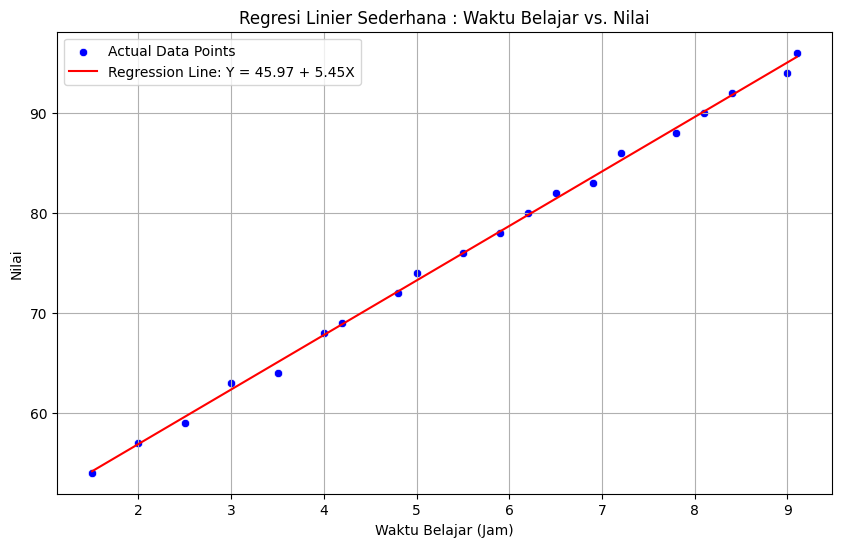

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate predicted Y values using the manually derived coefficients
Y_pred_user = beta0_sklearn + beta1_sklearn * X_user

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_user.flatten(), y=Y_user.flatten(), color='blue', label='Actual Data Points')
sns.lineplot(x=X_user.flatten(), y=Y_pred_user.flatten(), color='red', label=f'Regression Line: Y = {beta0_sklearn:.2f} + {beta1_sklearn:.2f}X')

plt.title('Regresi Linier Sederhana : Waktu Belajar vs. Nilai')
plt.xlabel('Waktu Belajar (Jam)')
plt.ylabel('Nilai')
plt.grid(True)
plt.legend()
plt.show()